# Finding the Best Markets to Advertise in

I'm working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. I want to investigate the markets in order to find out the 2 best markets to advertise our product in.

## Read and Understanding the Data

In [1]:
import pandas as pd
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)
# low_memory = False to silence dtypes warning
pd.options.display.max_columns = 150 # to avoid truncated output 

In [2]:
print(survey.shape)

(18175, 136)


In [3]:
print(survey.head())

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0                   NaN      

In [4]:
print(survey.columns[:20])

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC',
       'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons',
       'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone',
       'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls'],
      dtype='object')


In [5]:
print(survey.columns[20:40])

Index(['CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive',
       'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus',
       'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting',
       'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt',
       'HasFinancialDependents', 'HasHighSpdInternet'],
      dtype='object')


In [6]:
print(survey.columns[40:60])

Index(['HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt',
       'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income',
       'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev',
       'IsUnderEmployed', 'JobApplyWhen', 'JobInterestBackEnd',
       'JobInterestDataEngr', 'JobInterestDataSci', 'JobInterestDevOps',
       'JobInterestFrontEnd', 'JobInterestFullStack', 'JobInterestGameDev'],
      dtype='object')


In [7]:
print(survey.columns[60:80])

Index(['JobInterestInfoSec', 'JobInterestMobile', 'JobInterestOther',
       'JobInterestProjMngr', 'JobInterestQAEngr', 'JobInterestUX', 'JobPref',
       'JobRelocateYesNo', 'JobRoleInterest', 'JobWherePref', 'LanguageAtHome',
       'MaritalStatus', 'MoneyForLearning', 'MonthsProgramming', 'NetworkID',
       'Part1EndTime', 'Part1StartTime', 'Part2EndTime', 'Part2StartTime',
       'PodcastChangeLog'],
      dtype='object')


In [8]:
print(survey.columns[80:100])

Index(['PodcastCodeNewbie', 'PodcastCodePen', 'PodcastDevTea', 'PodcastDotNET',
       'PodcastGiantRobots', 'PodcastJSAir', 'PodcastJSJabber', 'PodcastNone',
       'PodcastOther', 'PodcastProgThrowdown', 'PodcastRubyRogues',
       'PodcastSEDaily', 'PodcastSERadio', 'PodcastShopTalk',
       'PodcastTalkPython', 'PodcastTheWebAhead', 'ResourceCodecademy',
       'ResourceCodeWars', 'ResourceCoursera', 'ResourceCSS'],
      dtype='object')


In [9]:
print(survey.columns[100:])

Index(['ResourceEdX', 'ResourceEgghead', 'ResourceFCC', 'ResourceHackerRank',
       'ResourceKA', 'ResourceLynda', 'ResourceMDN', 'ResourceOdinProj',
       'ResourceOther', 'ResourcePluralSight', 'ResourceSkillcrush',
       'ResourceSO', 'ResourceTreehouse', 'ResourceUdacity', 'ResourceUdemy',
       'ResourceW3S', 'SchoolDegree', 'SchoolMajor', 'StudentDebtOwe',
       'YouTubeCodeCourse', 'YouTubeCodingTrain', 'YouTubeCodingTut360',
       'YouTubeComputerphile', 'YouTubeDerekBanas', 'YouTubeDevTips',
       'YouTubeEngineeredTruth', 'YouTubeFCC', 'YouTubeFunFunFunction',
       'YouTubeGoogleDev', 'YouTubeLearnCode', 'YouTubeLevelUpTuts',
       'YouTubeMIT', 'YouTubeMozillaHacks', 'YouTubeOther',
       'YouTubeSimplilearn', 'YouTubeTheNewBoston'],
      dtype='object')


To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data).

## Checking for Sample Representativity

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What locations have the greatest densities of new coders.
- How much money they're willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The "JobRoleInterest" column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [10]:
freq_survey=survey['JobRoleInterest'].value_counts(normalize = True)*100
print(freq_survey)

Full-Stack Web Developer                                                                                                                                                                                  11.770595
  Front-End Web Developer                                                                                                                                                                                  6.435927
  Data Scientist                                                                                                                                                                                           2.173913
Back-End Web Developer                                                                                                                                                                                     2.030892
  Mobile Developer                                                                                                                                      

In [11]:
import numpy as np
survey_extended = survey.copy()
survey_extended["JobRoleInterest"]=survey_extended["JobRoleInterest"].fillna("")
def webinterested(el):
    if el.find("Web Developer")==-1:
        return 0
    else:
        return 1
def mobinterested(el):
    if el.find("Mobile Developer")==-1:
        return 0
    else:
        return 1
survey_extended["WebDev"]=survey_extended["JobRoleInterest"].apply(webinterested)
survey_extended["MobDev"]=survey_extended["JobRoleInterest"].apply(mobinterested)
print(survey_extended[["JobRoleInterest","WebDev","MobDev"]])

                                         JobRoleInterest  WebDev  MobDev
0                                                              0       0
1                               Full-Stack Web Developer       1       0
2        Front-End Web Developer, Back-End Web Develo...       1       1
3        Front-End Web Developer, Full-Stack Web Deve...       1       0
4      Full-Stack Web Developer, Information Security...       1       1
5                                                              0       0
6                               Full-Stack Web Developer       1       0
7                                                              0       0
8                                                              0       0
9      Full-Stack Web Developer,   Quality Assurance ...       1       0
10                                                             0       0
11       DevOps / SysAdmin,   Data Scientist, Informa...       0       0
12                                                 

In [12]:
mask=(survey_extended["WebDev"]==1)|(survey_extended["MobDev"]==1)
webmob_interest=survey_extended[mask].shape[0]
print(webmob_interest)

6030


In [13]:
mask2=survey_extended["JobRoleInterest"]==""
tot_interest=survey_extended[~mask2].shape[0]
print(tot_interest)

6992


In [14]:
perc_webmob=webmob_interest*100/tot_interest
perc_others=(tot_interest-webmob_interest)*100/tot_interest
web_mob_series=pd.Series([perc_webmob, perc_others], index=["Web/Mobile developer", "Other interests"])
print(web_mob_series)

Web/Mobile developer    86.241419
Other interests         13.758581
dtype: float64


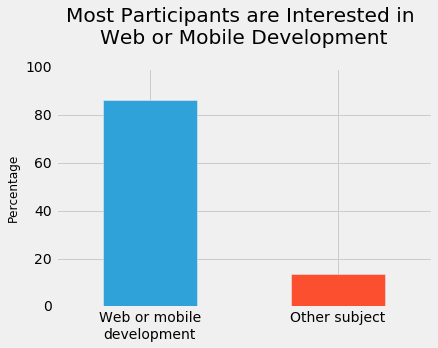

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
web_mob_series.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylim([0,100])
plt.show()

In the last cells I explored the interests of the programmers. Just 6992 of the 18175 partecipants have specific interests, and among them 6030 (86.2%) manifested interest for Web and Mobile Development, the other 13.8% for other topics.

## New Coders - Locations and Densities

We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

The data set provides information about the location of each participant at a country level. The "CountryCitizen" variable describes the country of origin for each participant, and the "CountryLive" variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the "CountryLive" variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

In [16]:
sample=survey_extended[~mask2]
print(sample.head(5))

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   
6  29.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   
6                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
1                   NaN      

In [17]:
abs_freq=sample['CountryLive'].value_counts()
rel_freq=sample['CountryLive'].value_counts(normalize = True)*100

In [18]:
print(abs_freq)

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Argentina   

In [19]:
print(rel_freq)

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Serbia                            0.760456
Philippines                       0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Singapore  

45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

## Spending Money for Learning

We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The "MoneyForLearning" column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

In [20]:
grouped = sample[["CountryLive","WebDev","MobDev"]].groupby('CountryLive')
freq_df=grouped.agg(np.sum)
freq_df=freq_df.sort_values(by="WebDev", ascending=False)
freq_df.reset_index(inplace=True)
print(freq_df.head())

                CountryLive  WebDev  MobDev
0  United States of America    2577    1052
1                     India     423     173
2            United Kingdom     272     106
3                    Canada     208      88
4                    Poland     118      30


Yes, the greatest markets are USA and India

In [21]:
print(sample["MonthsProgramming"].value_counts().sort_values())

51.0       1
56.0       1
73.0       1
41.0       1
83.0       1
89.0       1
111.0      1
124.0      1
46.0       1
408.0      1
300.0      1
69.0       1
264.0      1
370.0      1
198.0      1
171.0      1
49.0       1
113.0      1
105.0      1
43.0       1
180.0      1
86.0       1
190.0      1
58.0       1
37.0       2
59.0       2
38.0       2
156.0      2
108.0      2
33.0       2
        ... 
28.0      13
26.0      17
17.0      20
72.0      28
50.0      29
13.0      36
11.0      39
40.0      43
16.0      58
15.0      70
14.0      76
60.0      79
30.0      82
20.0      92
9.0      102
48.0     112
7.0      124
10.0     144
18.0     160
8.0      195
0.0      235
36.0     251
5.0      279
4.0      367
24.0     422
12.0     616
3.0      637
6.0      654
2.0      669
1.0      767
Name: MonthsProgramming, Length: 91, dtype: int64


In [22]:
def sub_zero(el):
    if el<0.5:
        return 1
    else:
        return el
sample2=sample.copy()
sample2["MonthsProgramming"]=sample["MonthsProgramming"].apply(sub_zero)
sample2["MoneyperMonth"]=sample2["MoneyForLearning"]/sample2["MonthsProgramming"]
print(sample2[["MonthsProgramming", "MoneyperMonth"]].head())

   MonthsProgramming  MoneyperMonth
1                6.0      13.333333
2                5.0     200.000000
3                5.0       0.000000
4               24.0       0.000000
6               12.0       0.000000


In [23]:
size=sample2[sample2["MoneyperMonth"].isnull()].shape[0]
print(size)

675


In [24]:
sample3=sample2[(sample2["MoneyperMonth"].notnull())|(sample2["CountryLive"].notnull())]
print(sample3.head())

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   
6  29.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   
6                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
1                   NaN      

In [25]:
grouped2 = sample3[['CountryLive', "MoneyperMonth"]].groupby('CountryLive')
mean_df=grouped2.agg(np.mean)
mean_df=mean_df.loc[["United States of America", "India", "United Kingdom", "Canada"], :]
print(mean_df)

                          MoneyperMonth
CountryLive                            
United States of America     227.997996
India                        135.100982
United Kingdom                45.534443
Canada                       113.510961


The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Dealing with Extreme Outliers

I'll use box plots to visualize the distribution of the money_per_month variable for each country.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(0, 10000)

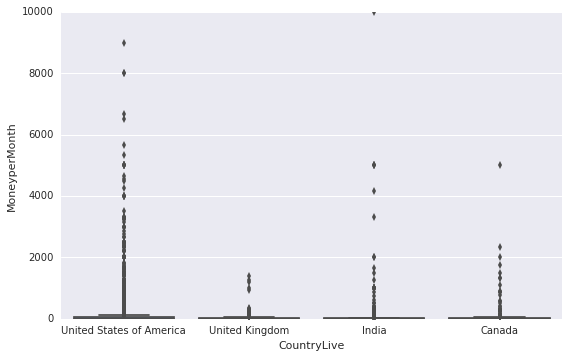

In [26]:
countries=["United States of America", "India", "United Kingdom", "Canada"]
sample4=sample3[sample3['CountryLive'].isin(countries)]

import seaborn as sns

ax=sns.boxplot(x = 'CountryLive', y = 'MoneyperMonth', data = sample4)
ax.set_ylim([0, 10000])

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(0, 100)

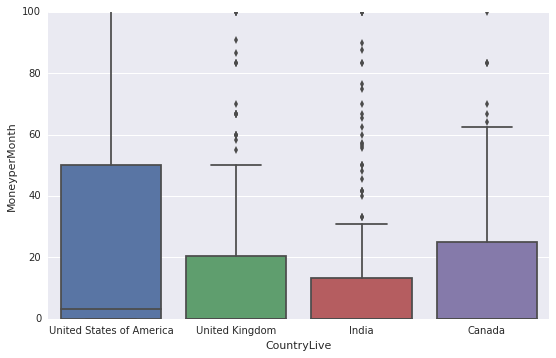

In [27]:
ax=sns.boxplot(x = 'CountryLive', y = 'MoneyperMonth', data = sample4)
ax.set_ylim([0, 100])

### The India distribution is dominated by outliers!

In [28]:
list_outliers=[]
for c in countries:
    df_temp=sample4[sample4['CountryLive']==c]
    series_percentiles = df_temp['MoneyperMonth'].describe(percentiles = [.25, .75])
    iqr = series_percentiles.loc["75%"] - series_percentiles.loc["25%"]
    upper_bound = series_percentiles.loc["75%"] + 1.5 * iqr
    list_outliers.append(upper_bound)
print(list_outliers)

[125.0, 33.125, 51.04166666666666, 62.5]


In [29]:
series_outliers=pd.Series(list_outliers, index=countries)
print(series_outliers)

United States of America    125.000000
India                        33.125000
United Kingdom               51.041667
Canada                       62.500000
dtype: float64


In [30]:
sample5=sample4.copy()
def lim_outliers(row):
    for c in countries:
        if row['CountryLive']==c:
            if row['MoneyperMonth']>series_outliers[c]:
                return 1
            else:
                return 0       
sample5["outliers"]=sample5.apply(lim_outliers, axis=1)
print(sample5["outliers"])

1        0
2        1
6        0
13       0
14       0
15       0
16       0
18       0
19       0
21       0
22       1
23       0
28       0
30       0
31       0
32       0
33       0
34       0
35       0
37       0
40       0
42       0
52       0
55       0
58       0
63       0
64       0
66       0
67       0
68       1
        ..
17995    0
17996    0
18000    0
18003    0
18006    0
18007    0
18014    0
18015    0
18017    0
18020    0
18037    0
18039    0
18041    0
18043    0
18044    0
18049    0
18050    0
18052    0
18055    0
18069    0
18071    0
18093    0
18107    1
18111    1
18113    0
18129    0
18130    0
18156    1
18163    0
18174    0
Name: outliers, Length: 4228, dtype: int64


In [31]:
sample6=sample5.copy()
sample6=sample6[sample6["outliers"]==0]
print(sample6.shape)

(3605, 140)


In [32]:
grouped3 = sample6[['CountryLive', "MoneyperMonth"]].groupby('CountryLive')
mean_df=grouped3.agg(np.mean)
print(mean_df)

                          MoneyperMonth
CountryLive                            
Canada                         6.826765
India                          2.530940
United Kingdom                 6.096647
United States of America      14.428544


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(0, 100)

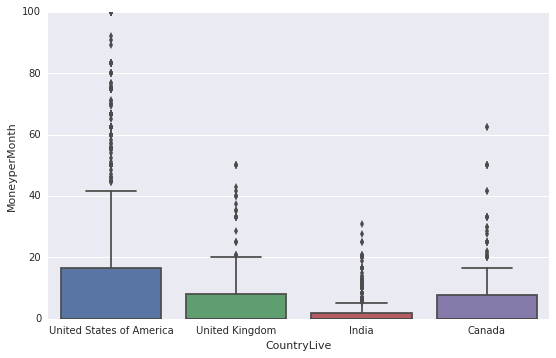

In [33]:
ax=sns.boxplot(x = 'CountryLive', y = 'MoneyperMonth', data = sample6)
ax.set_ylim([0, 100])

In [34]:
grouped4 = sample6[['CountryLive', "MoneyperMonth"]].groupby('CountryLive')
total_money_per_country=grouped4.agg(np.sum)
print(total_money_per_country)

                          MoneyperMonth
CountryLive                            
Canada                      1379.006539
India                        938.978677
United Kingdom              1426.615383
United States of America   35854.930911


## Conclusions

While it's clear the first market should be USA, the second is not so obvious.
Canada and UK are both good markets according to my calculations and assumptions.
Maybe it's better to consult the marketing team to select the "easier" market.